LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
import pandas as pd
import random
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('indicadores-mundiales.csv', sep=',', encoding='latin-1')
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data =data.rename(index = {'africa':'Africa'})
data = data.sort_index()
data1 = data.T/100
data1

Region,Africa,Asia,Europa,Las Americas,Oceania,Oriente Medio
Poblacion 0-14,111.362,53.186,37.802,53.755,17.848,17.547
Poblacion 15-64,144.527,106.687,138.306,109.018,31.331,32.511
Poblacion 65+,9.117,10.130,28.905,12.231,2.825,1.942


## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


Text(0, 0.5, 'Valor')

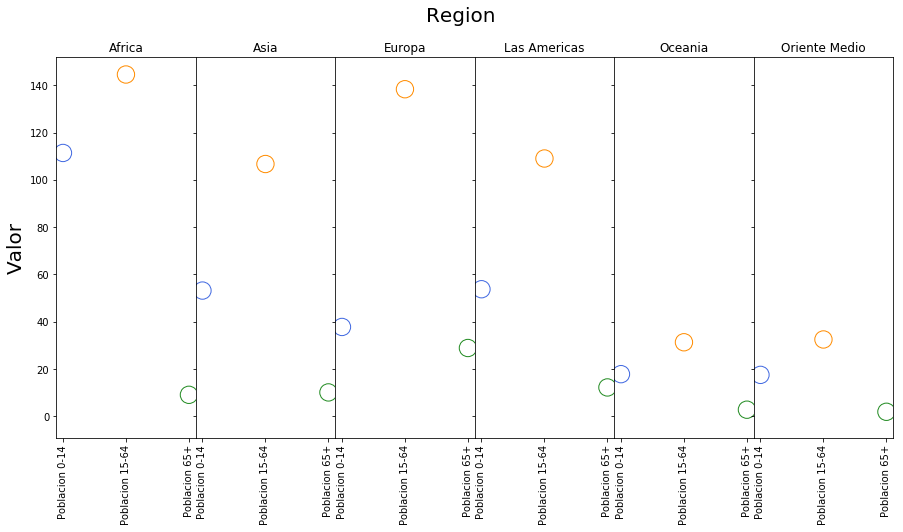

In [3]:
fig, ax = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(15, 7));
plt.subplots_adjust(wspace = 0, hspace=0.8)
for index, colname in enumerate(data1.columns):
    ax[index].scatter(list(data1.index), data1[colname], s=300, facecolors='none', marker='o', color = ['royalblue', 'darkorange', 'forestgreen'])
    ax[index].set_xticklabels(data1.index, rotation=90 )
    ax[index].set_title(colname)
    fig.suptitle('Región', fontsize=30);
fig.suptitle('Region', fontsize=20)
ax[0].set_ylabel(ylabel='Valor',fontsize=20)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


Text(0, 0.5, 'Valor')

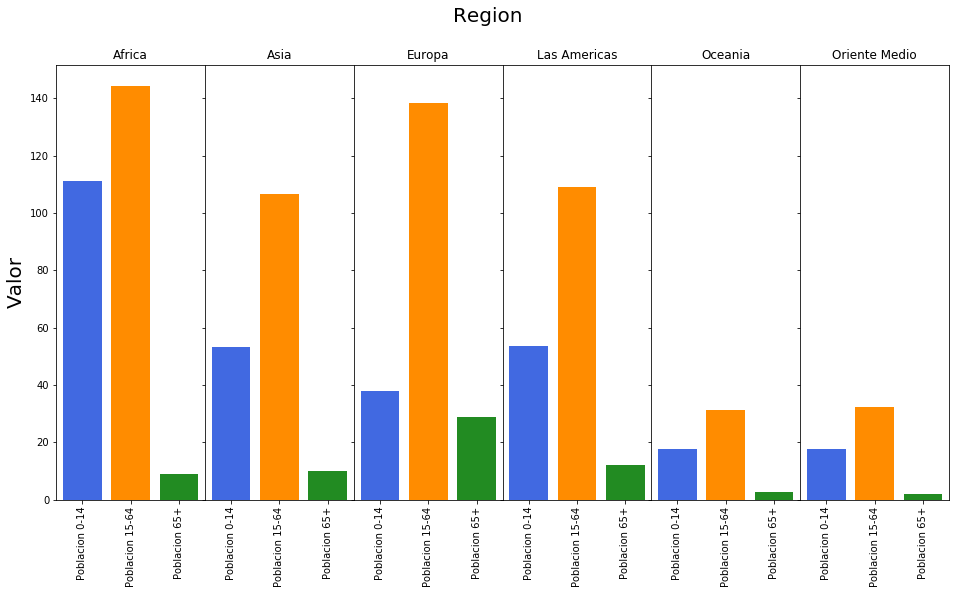

In [4]:
fig, ax = plt.subplots(1,6,figsize=(16, 8),sharey=True)
plt.subplots_adjust(hspace=0, wspace=0)

for index, colname in enumerate(data1.columns):
    #ax[index].subplot(1, 6, index+1)
    ax[index].bar(list(data1.index), data1[colname], color=['royalblue', 'darkorange', 'forestgreen'])
    ax[index].xaxis.set_tick_params(which='both', rotation=90)
    ax[index].set_title(colname);
fig.suptitle('Region', fontsize=20)
ax[0].set_ylabel(ylabel='Valor',fontsize=20)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

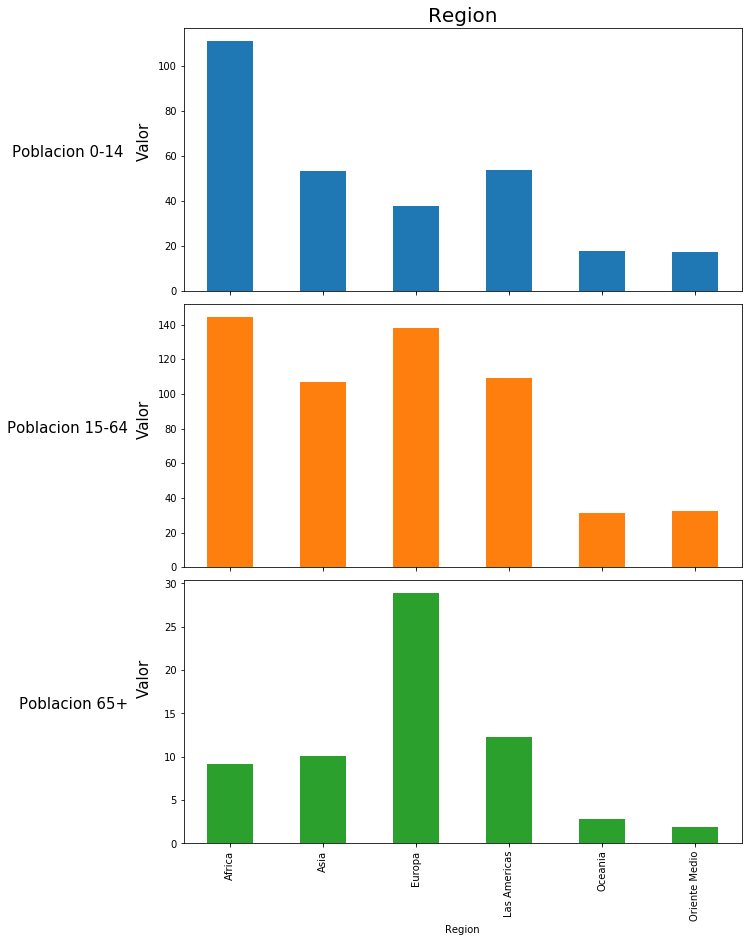

In [5]:
ax=(data/100).plot.bar(figsize=(10,15), subplots=True, sharex=True)
position=[70,90,20]
for index, colname in enumerate(data.columns):
    #ax[index].subplot(1, 6, index+1)
    #ax[index].set_ylabel('Valor', rotation=90 )
    ax[index].set_ylabel(colname, rotation=0, labelpad=90, fontsize=15 )
    ax[index].set_title('')
    ax[index].text(-1, position[index] , 'Valor', rotation='vertical', fontsize=15)
    ax[index].get_legend().remove();
ax[0].set_title('Region', fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.05)

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

In [6]:
m=df['Ano']
year = [z.split('-')[0] for z in m]
df['year']= year
data2=df.groupby(['Region','year']).mean()[['Gasto en salud (per capita)']]
data2=data2.reset_index()
data3= data2.groupby(['year','Region']).mean()['Gasto en salud (per capita)'].unstack()
x=list(data3.index)
data3.head()

Region,Asia,Europa,Las Americas,Oceania,Oriente Medio,africa
year,,,,,,
2000,182.100000,1143.454545,450.028571,349.454545,427.846154,50.52
2001,169.800000,1177.045455,463.228571,339.181818,459.230769,50.36
2002,169.612903,1359.477273,463.400000,376.454545,449.076923,50.98
2003,196.129032,1704.250000,493.542857,461.727273,511.000000,61.04
2004,215.580645,1975.931818,645.600000,NaN,NaN,73.46


In [46]:
data4=df.groupby(['Region','year']).mean()[['Gasto en salud (per capita)','Poblacion 0-14', 'Poblacion 15-64',
                                            'Poblacion 65+']].reset_index()
data4 =data4.rename(index = {'africa':'Africa'})
data4 = data4.sort_index()
data4['Poblacion 0-14']=data4['Poblacion 0-14']/100
data4['Poblacion 15-64']=data4['Poblacion 15-64']/100
data4['Poblacion 65+']=data4['Poblacion 65+']/100
data4

,Region,year,Gasto en salud (per capita),Poblacion 0-14,Poblacion 15-64,Poblacion 65+
0,Asia,2000,182.100000,0.325471,0.617794,0.056853
1,Asia,2001,169.800000,0.319353,0.622441,0.058118
2,Asia,2002,169.612903,0.313059,0.627441,0.059500
3,Asia,2003,196.129032,0.306441,0.632559,0.061059
4,Asia,2004,215.580645,0.299971,0.637618,0.062412
5,Europa,2000,1143.454545,0.191585,0.671561,0.136927
6,Europa,2001,1177.045455,0.188000,0.673195,0.138829
7,Europa,2002,1359.477273,0.184366,0.674683,0.140976
8,Europa,2003,1704.250000,0.180683,0.676195,0.143146
9,Europa,2004,1975.931818,0.177366,0.677683,0.145122


Text(0.5, 0.98, '')

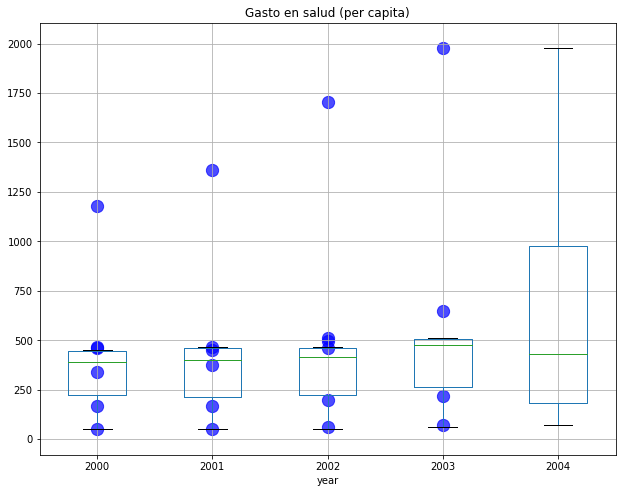

In [7]:
fig, ax = plt.subplots(1,figsize=(10,8))
#boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
#flierprops = dict(marker='o', markerfacecolor='blue', markersize=15, linestyle='none')
#meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='blue',  markersize=14)
#meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
data2.boxplot(column=['Gasto en salud (per capita)'], by='year', ax=ax, showfliers=False)
for index in (data3.columns):
    plt.scatter(x, list(data3[index]), s=150, c='blue', alpha=0.7);
plt.suptitle('')

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

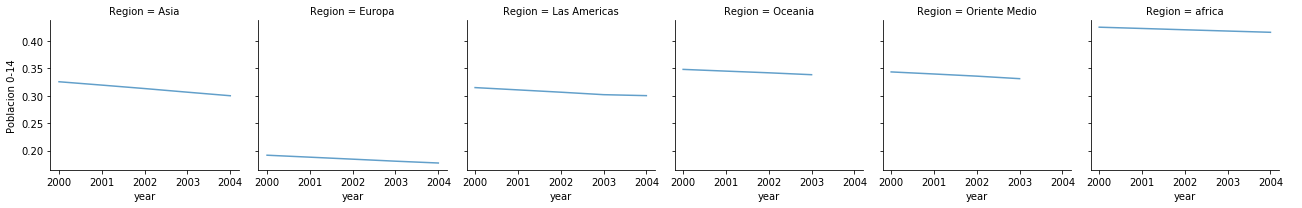

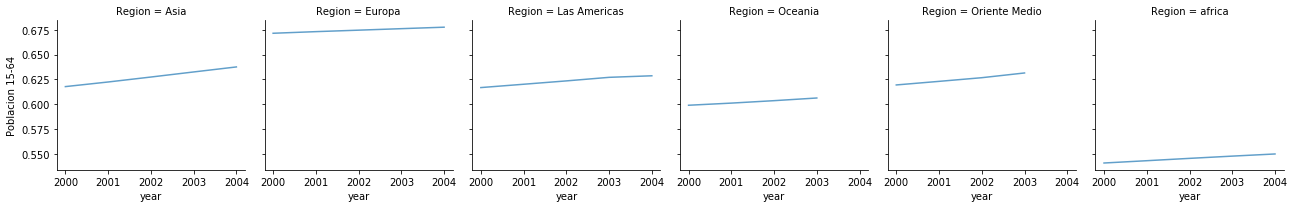

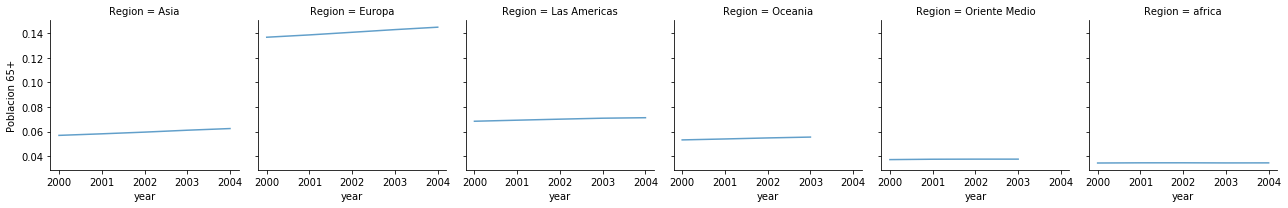

In [65]:
g1 = sns.FacetGrid(data4,col="Region")
g1.map(plt.plot, "year", "Poblacion 0-14",  alpha=.7)
g1.add_legend();

g2 = sns.FacetGrid(data4,col="Region")
g2.map(plt.plot, "year", "Poblacion 15-64", alpha=.7)


g2 = sns.FacetGrid(data4,col="Region")
g2.map(plt.plot, "year", "Poblacion 65+", alpha=.7)